In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [6]:
train_dir = "./train"
validation_dir = "./validation"
test_dir = "./test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [68]:
train_datagen = ImageDataGenerator( =1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size = 20,
                                                   class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size = 20,
                                                   class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32,
                        (3,3),
                        activation="relu",
                        input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,
                        (3,3),
                        activation="relu"))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,
                        (3,3),
                        activation="relu"))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,
                        (3,3),
                        activation="relu"))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"]
             )

In [15]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50
                             )

C:\Users\Joskar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 65s 613ms/step - loss: 0.6915 - acc: 0.5450 - val_loss: 0.6783 - val_acc: 0.5390
Epoch 2/20
100/100 [==============================] - 37s 364ms/step - loss: 0.6582 - acc: 0.6205 - val_loss: 0.6454 - val_acc: 0.6370
Epoch 3/20
100/100 [==============================] - 34s 342ms/step - loss: 0.6177 - acc: 0.6625 - val_loss: 0.6294 - val_acc: 0.6360
Epoch 4/20
100/100 [==============================] - 35s 347ms/step - loss: 0.5766 - acc: 0.7040 - val_loss: 0.5882 - val_acc: 0.6750
Epoch 5/20
100/100 [==============================] - 35s 350ms/step - loss: 0.5446 - acc: 0.7250 - val_loss: 0.5673 - val_acc: 0.7120
Epoch 6/20
100/100 [==============================] - 34s 340ms/step - loss: 0.5107 - acc: 0.7500 - val_loss: 0.5714 - val_acc: 0.6930
Epoch 7/20
100/100 [==============================] - 34s 342ms/step - loss: 0.4827 - acc: 0.7670 - val_loss: 0.5562 - val_acc: 0.6970
Epoch 8/20
100/100 [==============================] - 3

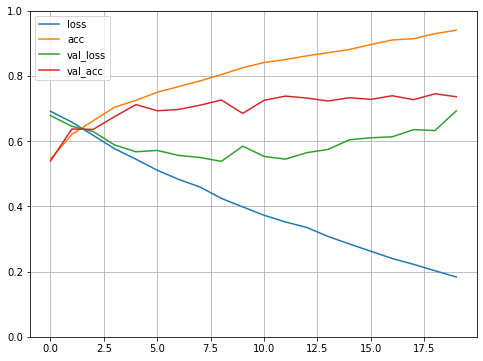

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.save("model.h5")

In [46]:
from tensorflow.keras import backend as k

k.clear_session()
del model

In [70]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True
)

test_datagen =  ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32,
                        (3,3),
                        activation="relu",
                        input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,
                        (3,3),
                        activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,
                        (3,3),
                        activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,
                        (3,3),
                        activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"]
             )

In [71]:
print(len(validation_generator))

32


In [63]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=63,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=32)

Epoch 1/100
63/63 [==============================] - 60s 941ms/step - loss: 0.4097 - acc: 0.8195
Epoch 2/100
63/63 [==============================] - 61s 968ms/step - loss: 0.3972 - acc: 0.8205
Epoch 3/100
63/63 [==============================] - 57s 903ms/step - loss: 0.4020 - acc: 0.8070
Epoch 4/100
63/63 [==============================] - 58s 913ms/step - loss: 0.3982 - acc: 0.8145
Epoch 5/100
63/63 [==============================] - 57s 902ms/step - loss: 0.3974 - acc: 0.8290
Epoch 6/100
63/63 [==============================] - 57s 917ms/step - loss: 0.3952 - acc: 0.8215
Epoch 7/100
63/63 [==============================] - 57s 897ms/step - loss: 0.4049 - acc: 0.8110
Epoch 8/100
63/63 [==============================] - 58s 923ms/step - loss: 0.3961 - acc: 0.8160
Epoch 9/100
63/63 [==============================] - 58s 913ms/step - loss: 0.3808 - acc: 0.8255
Epoch 10/100
63/63 [==============================] - 58s 909ms/step - loss: 0.3925 - acc: 0.8235
Epoch 11/100
63/63 [=========

63/63 [==============================] - 56s 879ms/step - loss: 0.3242 - acc: 0.8600
Epoch 85/100
63/63 [==============================] - 56s 879ms/step - loss: 0.3081 - acc: 0.8620
Epoch 86/100
63/63 [==============================] - 55s 869ms/step - loss: 0.3163 - acc: 0.8665
Epoch 87/100
63/63 [==============================] - 56s 879ms/step - loss: 0.3036 - acc: 0.8735
Epoch 88/100
63/63 [==============================] - 55s 885ms/step - loss: 0.3218 - acc: 0.8510
Epoch 89/100
63/63 [==============================] - 56s 880ms/step - loss: 0.2986 - acc: 0.8750
Epoch 90/100
63/63 [==============================] - 56s 884ms/step - loss: 0.3276 - acc: 0.8550
Epoch 91/100
63/63 [==============================] - 56s 887ms/step - loss: 0.3106 - acc: 0.8665
Epoch 92/100
63/63 [==============================] - 56s 882ms/step - loss: 0.3082 - acc: 0.8640
Epoch 93/100
63/63 [==============================] - 56s 890ms/step - loss: 0.2867 - acc: 0.8730
Epoch 94/100
63/63 [=============

In [64]:
model.save("model_1.h5")

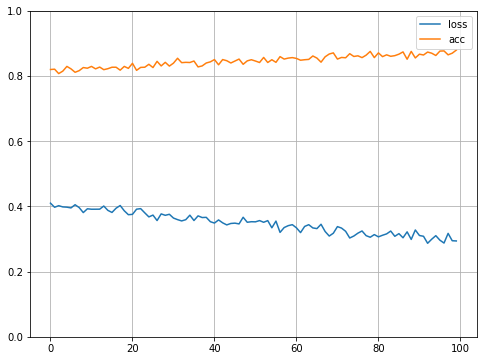

In [66]:
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [96]:
subject_datagen =  ImageDataGenerator(rescale=1./255)

subject_generator = subject_datagen.flow_from_directory("./subjects",
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode="binary")


Found 3 images belonging to 1 classes.


In [114]:
y_test_pred = model.predict(subject_generator)

In [115]:
y_test_pred

array([[0.98826516],
       [0.78143454],
       [0.01891035]], dtype=float32)

## VGG16 

In [117]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True
)

test_datagen =  ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [118]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights="imagenet",
                 include_top=False,
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 13s 0us/step


In [119]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [132]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [135]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [136]:
conv_base.trainable = False;

In [137]:
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=["acc"])

In [138]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cnn_project_models_cp/CNN_project-{epoch:02d}.h5")

In [ ]:
history = model.fit(train_datagen,
                    steps_per_epoch=100,epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50,callbacks=[checkpoint_cb])